# 회귀 분석

*지도학습* 기술에는 *특징* 세트에서 작동하도록 모델을 훈련시키고 이미 알려진 레이블 값이 포함된 데이터 세트를 사용하여 *라벨*을 예측하는 것이 포함됩니다. 훈련 프로세스는 특징을 알고 있는 레이블에 *맞추어* 레이블을 알 수 없는 새 특징에 적용할 수 있는 일반 함수을 정의하고 예측합니다. ***y*** 는 예측하려는 레이블을 나타내고 ***x*** 는 모형에서 예측하기 위해 사용하는 함수를 나타냅니다.

$$ y = f(x) $$

대부분의 경우 *x*는 실제로 여러 특성 값으로 구성된 *벡터*이므로 좀 더 정확하게 말하자면 함수는 다음과 같이 표현할 수 있습니다.

$$ y = f([x_1, x_2, x_3, ...]) $$

모델 학습의 목표는 *y* 결과를 생성하는 *x* 값에 대해 일종의 계산을 수행하는 함수를 찾는 것입니다. 학습 데이터 세트의 모든 경우에 대해 *y*를 합리적으로 정확하게 생성하는 계산에 *x* 값을 맞추려고 시도하는 기계 학습 *알고리즘*을 적용하여 이를 수행합니다.

지도학습을 위한 많은 기계학습 알고리즘이 있으며 크게 두 가지 유형으로 나눌 수 있습니다.

- **_Regression_ 알고리즘** : 주택 가격 또는 판매 거래 수와 같은 숫자 값인 *y* 값을 예측하는 알고리즘입니다.
- **_Classification_ 알고리즘** : 관찰이 속한 카테고리 또는 *클래스*를 예측하는 알고리즘. 분류 모델의 *y*값은 각 클래스에 대해 하나씩 0과 1 사이의 확률 값으로 구성된 벡터로, 각 클래스에 속하는 관측치의 확률을 나타냅니다.

이 노트북에서는 자전거 공유 계획에 대한 데이터를 수집하고 계절 및 날씨 조건에 따라 대여 횟수를 예측하는 데 사용하는 실제 연구를 기반으로 한 예를 사용하여 *회귀*에 중점을 둘 것입니다. 해당 연구에서 가져온 데이터 세트의 단순화 된 버전을 사용합니다.

> **인용** : 이 실습에 사용 된 데이터는 [Capital Bikeshare](https://www.capitalbikeshare.com/system-data)에서 파생되었으며 게시 되어 있습니다. [license agreement](https://www.capitalbikeshare.com/data-license-agreement).


## 데이터 탐색

기계 학습 프로젝트의 첫 번째 단계는 모델 학습에 사용할 데이터를 탐색하는 것입니다. 이 탐색의 목표는 변수 간의 관계를 이해하는 것입니다. 특히 *특징*과 *라벨* 사이의 명백한 상관 관계는 모델이 예측하려고 시도 합니다. 이를 위해서는 데이터의 문제를 탐색하고 수정 (예 : 결측값, 오류 또는 이상값 처리)하고, 기존 기능을 변환하거나 결합하여 새 특성 열을 도출해야 합니다 (*특징 엔지니어링*이라고하는 프로세스). 숫자 특성 (측정하거나 계산할 수있는 값)을 *정규화* 하여 유사한 척도에 있도록하고 범주 특성 (불연속 범주를 나타내는 값)을 숫자 지표로 *인코딩*합니다.

자전거 공유 데이터를 **Pandas** DataFrame으로로드하고 처음 몇 개의 행을 보는 것으로 시작하겠습니다.

In [1]:
import pandas as pd

# load the training dataset
bike_data = pd.read_csv('data/daily-bike-share.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


이 데이터는 다음 열과 내용으로 구성됩니다.

- **instant** : 고유 한 행 식별자
- **dteday** : 데이터가 관찰 된 날짜-이 데이터의 경우 매일 수집되었습니다. 날짜 당 하나의 행이 있습니다.
- **season** : 계절을 나타내는 숫자로 인코딩 된 값 (1 : 봄, 2 : 여름, 3 : 가을, 4 : 겨울)
- **yr** : 관찰이 이루어진 연구 연도 (연구가 2년에 걸쳐 수행됨 - 0 : 2011년, 1 : 2012년)
- **mnth** : 관측이 이루어진 달 (1 : 1 월 ... 12:12 월)
- **holiday** : 공휴일 관찰 여부를 나타내는 바이너리 값)
- **weekday** : 관찰이 이루어진 요일 (0 : 일요일 ... 6 : 토요일)
- **workingday** : 해당 요일이 근무일 (주말 또는 공휴일 아님)인지 여부를 나타내는 바이너리 값
- **weathersit** : 날씨 상황을 나타내는 범주 값 (1 : 맑음, 2 : 안개 / 구름, 3 : 약한 비 / 눈, 4 : 폭우 / 우박 / 눈 / 안개)
- **temp** : 섭씨 온도 (정규화)
- **atemp** : 섭씨 (정규화)로 표시된 겉보기 ( "느낌 같은") 온도
- **hum** : 습도 수준 (정규화)
- **windspeed** : 풍속 (정규화)
- **rentals** : 기록 된 자전거 대여 수입니다.

이 데이터 세트에서 **rentals**는 모델이 예측을 위해 학습되어야하는 라벨 (*y* 값)을 나타냅니다. 다른 열은 잠재적 특징 (*x* 값)입니다.

앞서 언급했듯이 일부 *특징 엔지니어링*을 수행하여 새로운 기능을 결합하거나 파생할 수 있습니다. 예를 들어 기존 **dteday** 열에서 요일 구성 요소를 추출하여 **day**라는 새 열을 데이터 프레임에 추가해 보겠습니다. 새 열은 1부터 31까지의 날짜를 나타냅니다.

In [2]:
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
bike_data.head(32)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,6
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,7
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,8
8,9,1/9/2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,9
9,10,1/10/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,10


자, 몇 가지 주요 기술 통계를 조사하여 데이터 분석을 시작하겠습니다. 데이터 프레임의 **describe** 메서드를 사용하여 수치형 변수와 **rentals** 라벨 열의 통계치를 확인 할 수 있습니다.

In [3]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
bike_data[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


통계치는 관측치 수 (731 개 레코드 있음), 평균, 표준 편차, 최소값 및 최대 값, 사 분위수 값 (데이터의 25 %, 50 %(중앙값)과 75%에 대한 임계 값)을 포함하여 각 수치형 변수의 데이터 분포에 대한 정보를 보여줍니다. 이것으로부터 우리는 일일 자전거 대여의 평균 수가 약 848임을 알 수 있습니다. 그러나 상대적으로 큰 표준 편차로 하루 자전거 대여 횟수에 많은 편차가 있음을 나타냅니다.

데이터를 시각화하여 자전거 대여 값 분포에 대한 더 명확한 아이디어를 얻을 수 있습니다. 수치형 데이터 분포를 시각화 하기 위해서 일반적인 플롯 유형은 *histograms* 및 *box plots* 이므로 Python의 **matplotlib** 라이브러리를 사용하여 **rentals** 열에 대해 각각 하나씩 생성해 보겠습니다.

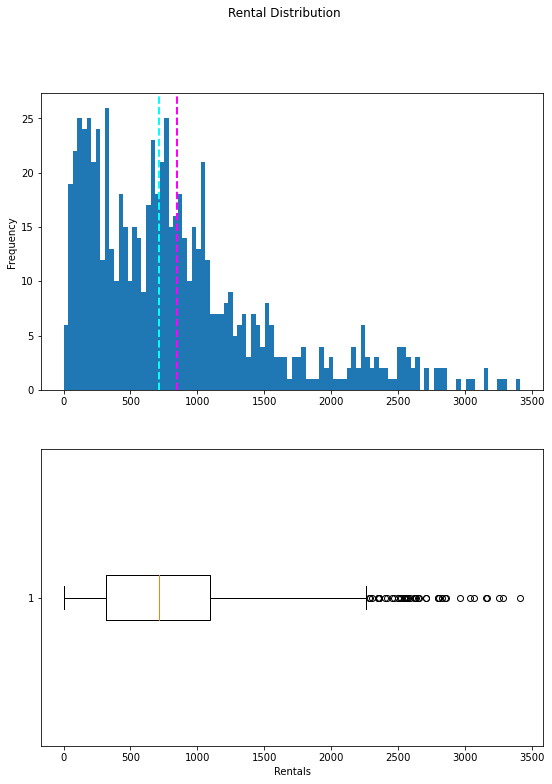

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the label column
label = bike_data['rentals']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rentals')

# Add a title to the Figure
fig.suptitle('Rental Distribution')

# Show the figure
fig.show()


그래프에 따르면 일일 대여 횟수가 0에서 3,400을 약간 넘습니다. 그러나 일일 대여의 평균 (및 중앙값)은 해당 범위의 하한에 가까워 대부분의 데이터는 0 ~ 2,200 건 사이입니다. 위의 몇 가지 값은 상자 수염 그림에 작은 원으로 표시되어 *이상치*임을 나타냅니다. 즉, 대부분의 데이터의 일반적인 범위를 벗어난 비정상적으로 높거나 낮은 값입니다.

수치형 변수에 동일한 종류의 시각적 탐색을 수행 할 수 있습니다. 각각에 대한 히스토그램을 만들어 보겠습니다.

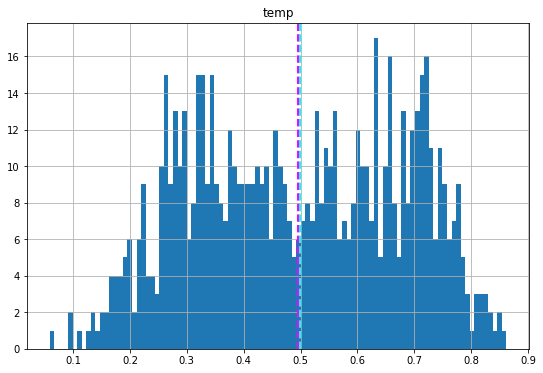

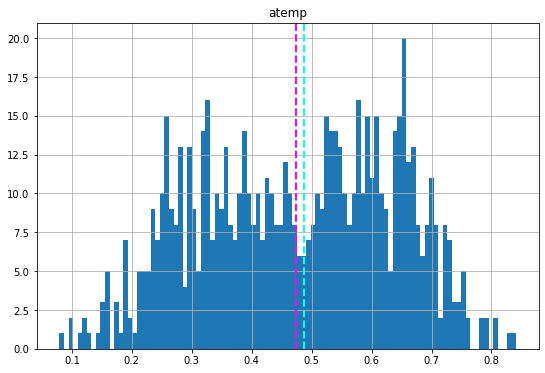

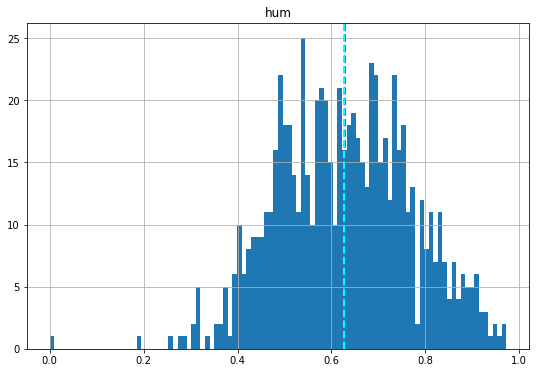

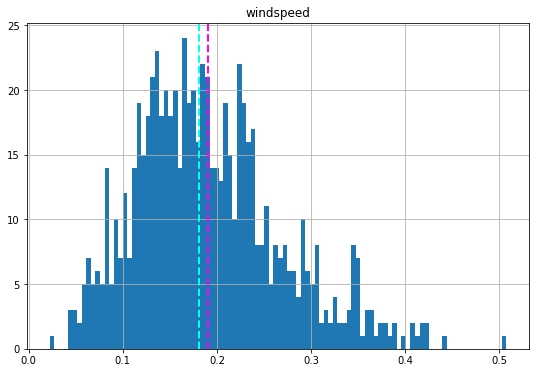

In [5]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

수치형 변수는 더 *정상적으로* 분포되어 있고 평균과 중앙값이 값 범위의 중간에 가까워 가장 일반적으로 발생하는 값이있는 위치와 일치합니다.

> **참고** : 분포는 통계적 의미에서 진정한 *정규*가 아니므로 중앙에 평균과 모드 (가장 일반적인 값)가있는 부드럽고 대칭적인 "종 모양 곡선" 히스토그램이 생성됩니다. 그러나 그들은 일반적으로 대부분의 관측치가 중간 정도의 값을 가지고 있음을 나타냅니다.

데이터 세트에서 수치형 변수들의 분포를 살펴 봤지만 범주형 변수는 어떨까요? 범주형은 연속된 숫자가 아니므로 히스토그램을 사용할 수 없습니다. 그러나 각 범주에 대한 각 개별 값의 개수를 보여주는 막대 차트를 그릴 수 있습니다.

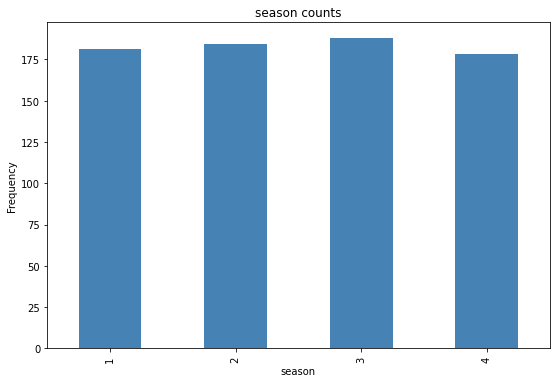

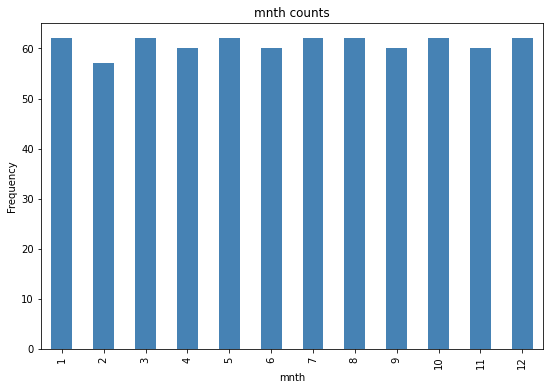

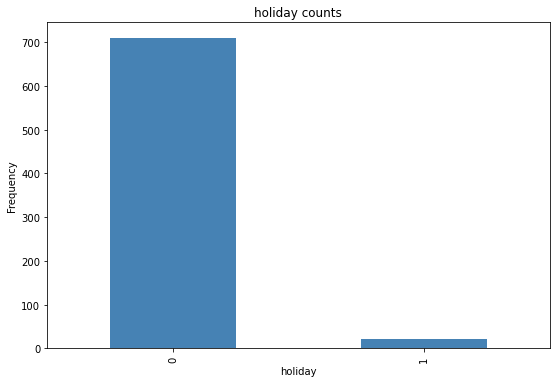

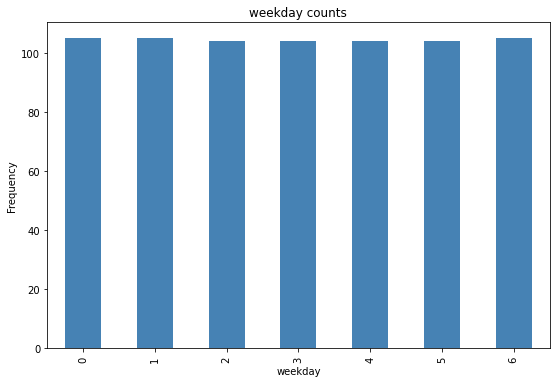

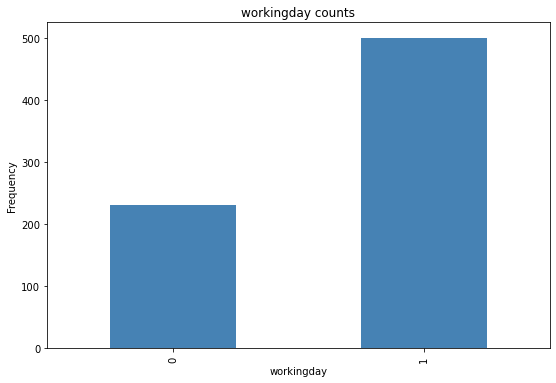

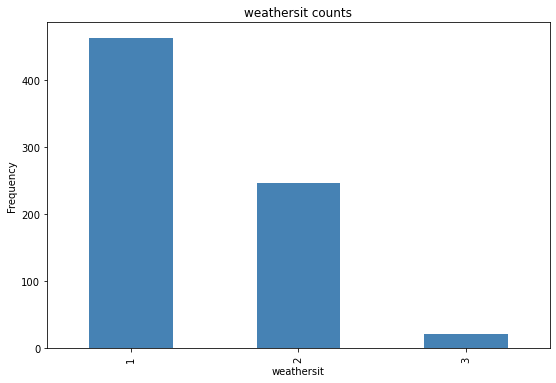

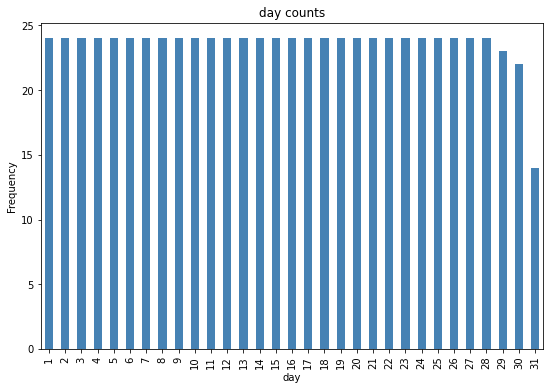

In [6]:
import numpy as np

# plot a bar plot for each categorical feature count
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']

for col in categorical_features:
    counts = bike_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()


범주형 변수는 다소 *균일한* 분포를 보여줍니다 (즉, 각 범주에 대해 대략 동일한 수의 행이 있음을 의미). 
예외는 다음과 같습니다.

- **holiday**: 그렇지 않은 날보다 공휴일 인 날이 더 적습니다.
- **workingday** : 휴무일보다 더 많은 근무일이 있습니다.
- **weathersit**: 대부분의 날은 카테고리 *1*(맑음)이며 카테고리 *2*(안개와 구름)는 다음으로 가장 흔합니다. 카테고리 *3* (약한 비 또는 눈) 일은 비교적 적고 카테고리 *4*(폭우, 우박 또는 안개) 일은 전혀 없습니다.

이제 열의 데이터 분포에 대해 알고 있으므로 데이터의 예측 변수와 **대여(rentals)** 레이블 간의 관계를 찾을 수 있습니다.

수치형 변수의 경우 변수 값과 레이블 값의 교차점을 표시하는 산점도를 만들 수 있습니다. *상관관계*를 계산하여 명백한 관계를 정량화 할 수도 있습니다.

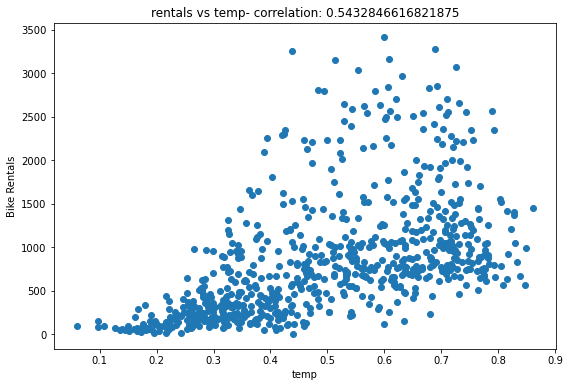

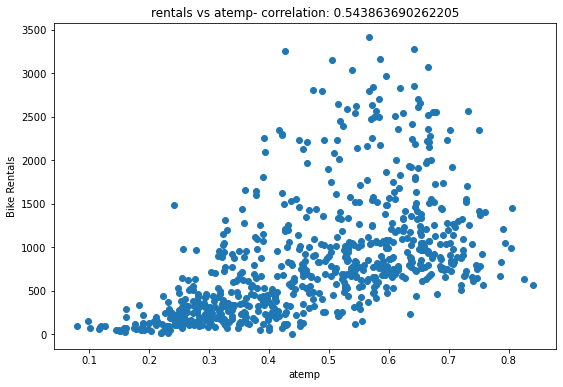

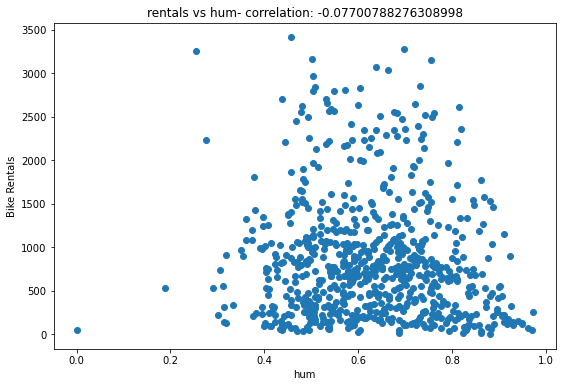

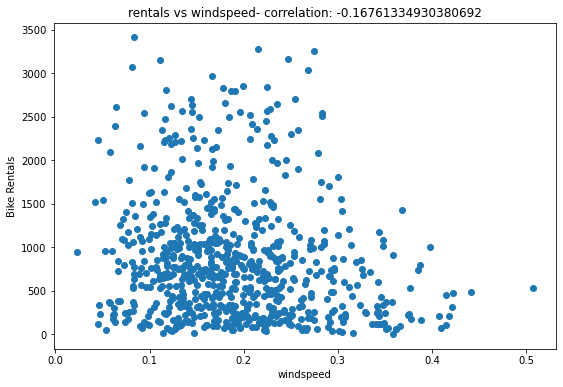

In [7]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    label = bike_data['rentals']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Bike Rentals')
    ax.set_title('rentals vs ' + col + '- correlation: ' + str(correlation))
plt.show()


결과는 결정적이지 않지만 **temp** 및 **atemp**에 대한 산점도를 자세히 살펴보면 더 높은 대여 횟수가 더 높은 온도와 일치하는 경향이 있음을 보여주는 모호한 대각선 추세를 볼 수 있습니다. 이 두 특징에 대한 상관 관계 값이 0.5를 약간 넘으면 이 관찰을 뒷바침합니다. 반대로 **hum** 과 **windspeed**에 대한 플롯은 약간 음의 상관 관계를 보여 습도나 풍속이 높은 날에는 자전거 대여가 적다는 것을 나타냅니다.

이제 범주형 변수를 레이블 값과 비교해 보겠습니다. 각 범주에 대한 대여 횟수의 분포를 보여주는 상자 수염 그림을 만듭니다.

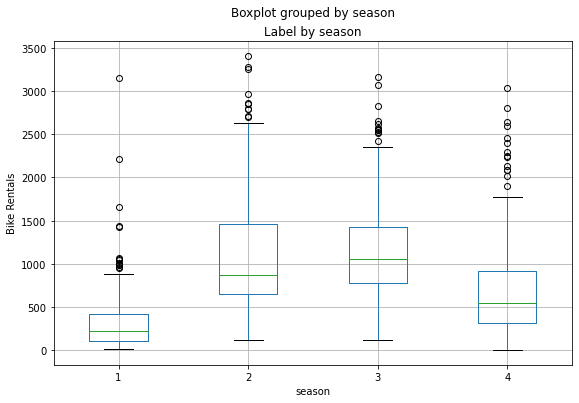

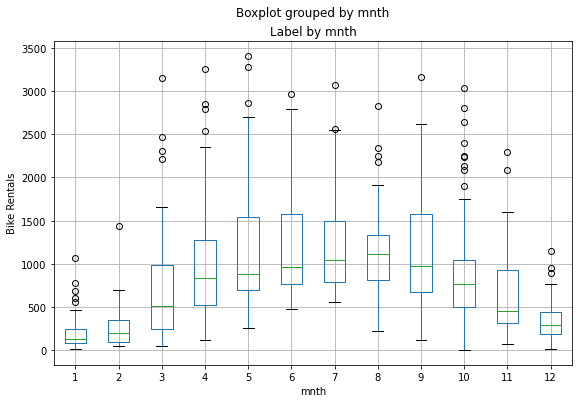

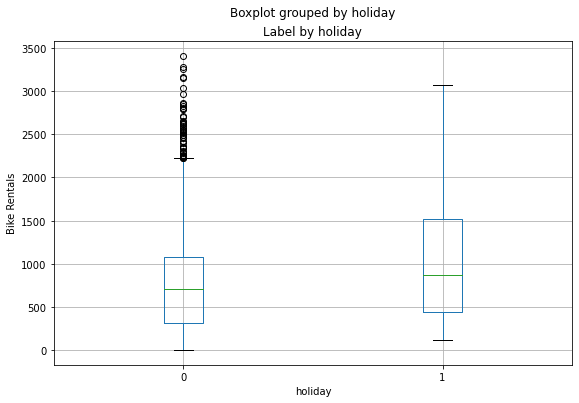

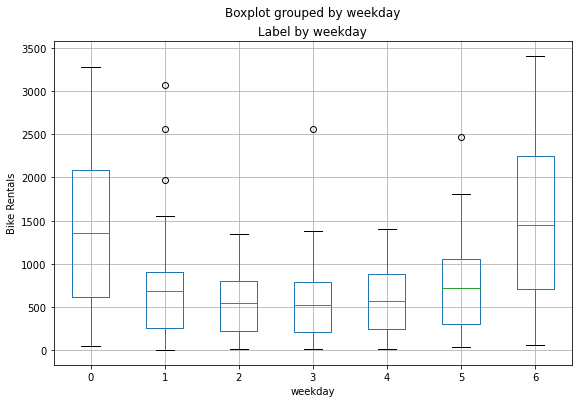

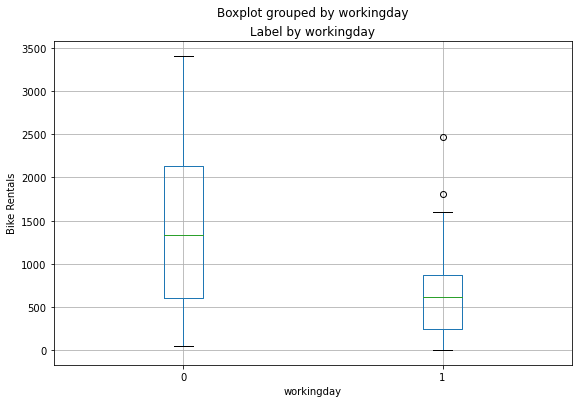

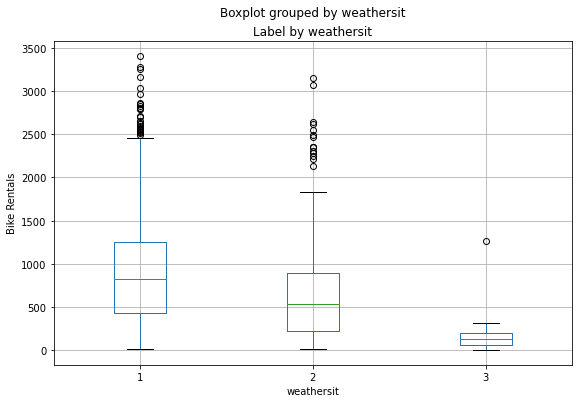

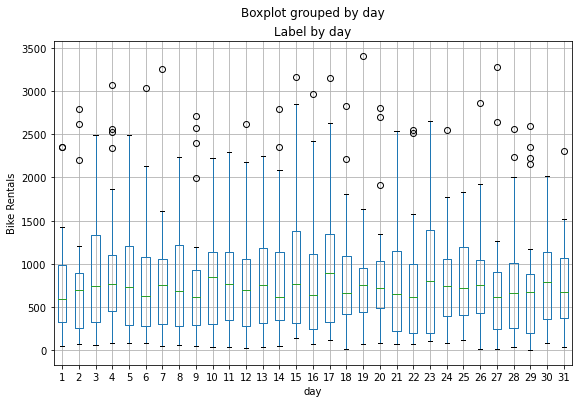

In [8]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column = 'rentals', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

플롯은 일부 범주값과 대여횟수(레이블) 간의 관계에서 약간의 차이를 보여줍니다. 예를 들어 주말 (**평일** 0 또는 6)과 근무 주 (**평일** 1 ~ 5)에 대여횟수 분포에 분명한 차이가 있습니다. 마찬가지로 **휴일** 및 **근무일** 카테고리에도 눈에 띄는 차이가 있습니다. 봄과 겨울에 비해 여름과 가을에 다른 임대 분포를 보여주는 눈에 띄는 추세가 있습니다. **weathersit** 카테고리도 대여횟수 분포에 차이를 만드는 것 같습니다. 해당 월의 날짜에 대해 만든 **day** 변수는 변동이 거의 없어 대여횟수를 예측할 수 없음을 나타냅니다.

## 회귀 모델 훈련

이제 데이터를 탐색 했으므로 **rentals** 레이블을 예측하기 위해 잠재적으로 식별한 변수들을 회귀 모델을 학습하는데 사용할 때입니다. 가장 먼저해야 할 일은 데이터에서 예측할 라벨과 모델 학습에 사용할 변수를 분리하는 것입니다.

In [9]:
# Separate features and labels
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[1.        1.        0.        6.        0.        2.        0.344167
  0.363625  0.805833  0.160446 ]
 [1.        1.        0.        0.        0.        2.        0.363478
  0.353739  0.696087  0.248539 ]
 [1.        1.        0.        1.        1.        1.        0.196364
  0.189405  0.437273  0.248309 ]
 [1.        1.        0.        2.        1.        1.        0.2
  0.212122  0.590435  0.160296 ]
 [1.        1.        0.        3.        1.        1.        0.226957
  0.22927   0.436957  0.1869   ]
 [1.        1.        0.        4.        1.        1.        0.204348
  0.233209  0.518261  0.0895652]
 [1.        1.        0.        5.        1.        2.        0.196522
  0.208839  0.498696  0.168726 ]
 [1.        1.        0.        6.        0.        2.        0.165
  0.162254  0.535833  0.266804 ]
 [1.        1.        0.        0.        0.        1.        0.138333
  0.116175  0.434167  0.36195  ]
 [1.        1.        0.        1.        1.        1.        

데이터 세트를 분리 한 후, 이제 예측 변수을 포함하는 **X**라는 배열과 라벨을 포함하는 **y** 배열이 있습니다.

우리는 모든 데이터를 사용하여 모델을 훈련 시킬 수 있습니다. 그러나 지도 학습에서는 데이터를 두 개의 하위 집합으로 분할하는 것이 일반적입니다. 
모델을 훈련하는 데 사용되는 세트와 훈련된 모델의 유효성을 검사하는데 사용되는 작은 "hold-back"세트. 이를 통해 예측된 레이블을 True 레이블과 비교하여 검증 데이터 세트와 함께 사용할 때 모델의 성능을 평가할 수 있습니다. 데이터를 *무작위로* 분할하는 것이 중요합니다.(즉, 데이터의 70 %를 학습용으로 취하고 나머지는 검증 용으로 유지하는 것)
이렇게하면 데이터의 두 하위 집합이 통계적으로 비교할 수 있습니다/(따라서 학습 된 데이터와 통계적 분포가 유사한 데이터로 모델의 유효성을 검사합니다)

데이터를 무작위로 분할하기 위해 **scikit-learn** 라이브러리의 **train_test_split** 함수를 사용합니다. 이 라이브러리는  Python에서 가장 널리 사용되는 기계 학습 패키지 중 하나입니다.

In [10]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 511 rows
Test Set: 220 rows


이제 다음 4 개의 데이터 세트가 있습니다.

- **X_train** : 모델 학습에 사용할 변수
- **y_train** : 모델 학습에 사용할 해당 라벨
- **X_test** : 모델 유효성 검사에 사용할 변수
- **y_test** : 모델 유효성 검사에 사용할 해당 라벨

이제 훈련 데이터에 적합한 회귀 알고리즘을 적용하여 모델을 훈련 할 준비가되었습니다. *X* 값과 *y* 레이블 사이의 선형 관계를 찾으려고 학습하는 회귀의 공통 시작점인 *선형 회귀* 알고리즘을 사용합니다. 결과 모델은 가능한 모든 X 및 y 값 조합이 교차하는 선을 개념적으로 정의하는 함수입니다.

Scikit-Learn에서 학습 알고리즘은 *추정기*에 캡슐화되며, 이 경우 **LinearRegression** 추정기를 사용하여 선형 회귀 모델을 학습합니다.

In [11]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


### 훈련 된 모델 평가

이제 모델을 학습 했으므로, 이를 사용하여 유효성 검사 데이터 세트에서 보류 한 기능에 대한 대여 횟수를 예측할 수 있습니다. 그런 다음 예측을 실제 라벨 값과 비교하여 모델이 얼마나 잘 작동하는지 평가할 수 있습니다. 

In [12]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.]
Actual labels   :  [2418  754  222   47  244  145  240  555 3252   38]


각 예측 값을 해당 실제 값과 비교하는 것은 모델이 얼마나 잘 예측하고 있는지를 결정하는 효율적인 방법이 아닙니다. 예측을 실제 레이블과 비교하는 산점도를 시각화하여 더 나은 결과를 얻을 수 있는지 살펴 보겠습니다. 또한 추세선을 추가하여 예측된 라벨이 실제 라벨과 얼마나 잘 정렬되는지에 대한 대략적인 감을 얻습니다.

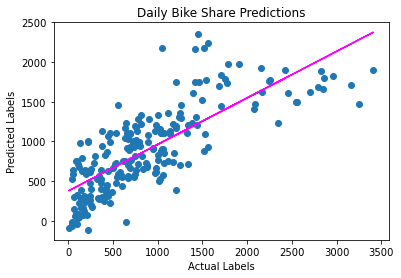

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

명확한 대각선 추세가 있으며 예측 값과 실제 값의 교차점은 일반적으로 추세선의 경로를 따릅니다. 그러나 선이 나타내는 이상적인 기능과 결과 사이에는 상당한 차이가 있습니다. 이 분산은 모델의 *잔차* 를 나타냅니다. 즉, 모델이 학습 중에 학습한 계수를 검증 데이터에 적용할 때 예측된 레이블과 검증 레이블의 실제 값 간의 차이를 나타냅니다. 검증 데이터에서 평가할 때 이러한 잔차는 레이블을 알 수 없는 새 데이터와 함께 모델을 사용할 때 예상되는 *오류* 수준을 나타냅니다.

일반적으로 사용되는 여러 평가 메트릭을 계산하여 잔차를 정량화 할 수 있습니다. 다음 세 가지에 초점을 맞출 것입니다.

- **평균 제곱 오차 (MSE)** : 예측 값과 실제 값 사이의 제곱 차이의 평균입니다. 이렇게하면 값이 작을수록 모델이 더 잘 맞는 평가 메트릭이 생성됩니다.
- **RMSE (Root Mean Square Error)** : MSE의 제곱근입니다. 이렇게하면 레이블과 동일한 단위 (이 경우 대여 수)의 절대 측정 항목이 생성됩니다. 값이 작을수록 모델이 더 좋습니다 (단순한 의미에서 예측이 잘못된 평균 대여횟수를 나타냅니다!).
- **결정 계수(일반적으로 *R-squre* 또는 R <sup>2</sup>라고 함)** : 값이 높을수록 모델이 더 잘 맞는 상대 측정 항목입니다. 본질적으로이 측정 항목은 모델이 예측할 수있는 라벨 값과 실제 라벨 값 간의 차이를 나타냅니다.

> **참고** :[Scikit-Learn documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)n에서 회귀 모델을 평가하기 위한 여러 메트릭에 대해 자세히 알아볼 수 있습니다.)

Scikit-Learn을 사용하여 검증 데이터에 대해 생성한 예측을 기반으로 모델에 대한 이러한 메트릭을 계산해 보겠습니다.

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 201972.5594703562
RMSE: 449.4135728595168
R2: 0.6040454736919185


이제 우리는 대여횟수를 예측하는 모델의 성능을 정량화 했습니다.

## 알고리즘 실험

모델 학습에 사용한 선형 회귀 알고리즘에는 예측 기능이 있지만 다음을 포함하여 시도 할 수있는 여러 종류의 회귀 알고리즘이 있습니다.

- **선형 알고리즘** : 위에서 사용한 선형 회귀 알고리즘 (기술적으로 *Ordinary Least Squares* 알고리즘)뿐만 아니라 *Lasso* 및 *Ridge*와 같은 다른 변형도 있습니다.
- **트리 기반 알고리즘** : 예측에 도달하기 위해 의사 결정 트리를 구축하는 알고리즘.
- **앙상블 알고리즘** : 일반화 가능성을 개선하기 위해 여러 기본 알고리즘의 출력을 결합하는 알고리즘.

> **참고** :지도 머신 러닝을 위한 알고리즘을 캡슐화하는 Scikit-Learn estimator의 전체적인 목록은  [Scikit-Learn documentation](https://scikit-learn.org/stable/supervised_learning.html)를 참조하세요. 선택할 수있는 알고리즘은 여러 가지가 있지만 대부분의 실제 시나리오에서 [Scikit-Learn estimator cheat sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)에서 찾을 수 있습니다.

### 다른 선형 알고리즘 시도

**Lasso** 알고리즘을 사용하여 회귀 모델을 학습해보겠습니다. 훈련 코드에서 estimator만 변경하면됩니다.

Lasso() 

MSE: 201155.70593338404
RMSE: 448.5038527519959
R2: 0.6056468637824488


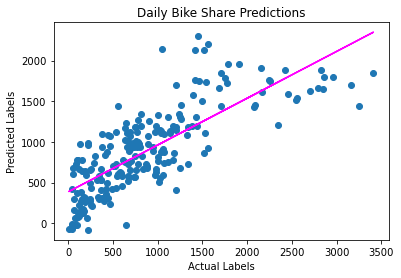

In [15]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### 의사 결정 트리 알고리즘 사용해보기

선형 모델의 대안으로 데이터 집합의 기능을 일련의 평가에서 검사하는 트리 기반 접근 방식을 사용하는 기계 학습용 알고리즘 범주가 있으며, 각 알고리즘은 *의사 결정 트리 기반* 의 분기를 생성합니다. 각 *분기* 끝에는 변수 값을 기반으로 예측 된 레이블 값이 있는 리프 노드가 있습니다.

예제를 통해 이것이 어떻게 작동하는지 보는 것이 가장 쉽습니다. 자전거 대여 데이터를 사용하여 의사 결정 트리 회귀 모델을 훈련시켜 보겠습니다. 모델을 학습 한 후 아래 코드는 모델 정의와 레이블 값을 예측하는 데 사용하는 트리의 텍스트 표현을 출력합니다.

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_6 <= 0.45
|   |--- feature_4 <= 0.50
|   |   |--- feature_7 <= 0.32
|   |   |   |--- feature_8 <= 0.41
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_6 <= 0.29
|   |   |   |   |   |   |--- feature_8 <= 0.36
|   |   |   |   |   |   |   |--- value: [558.00]
|   |   |   |   |   |   |--- feature_8 >  0.36
|   |   |   |   |   |   |   |--- value: [515.00]
|   |   |   |   |   |--- feature_6 >  0.29
|   |   |   |   |   |   |--- value: [317.00]
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- feature_9 <= 0.28
|   |   |   |   |   |   |--- feature_8 <= 0.37
|   |   |   |   |   |   |   |--- value: [968.00]
|   |   |   |   |   |   |--- feature_8 >  0.37
|   |   |   |   |   |   |   |--- value: [981.00]
|   |   |   |   |   |--- feature_9 >  0.28
|   |   |   |   |   |   |--- feature_8 <= 0.40
|   |   |   |   |   |   |   |--- value: [710.00]
|   |   |   |   |   |   |--- feature_8 >  0.40
|   |   |   |   |   |   |   |--- val

이제 트리 기반 모델이 생겼습니다. 하지만 좋은 모델인지는 테스트 데이터로 평가 해봅시다.

MSE: 241567.60454545455
RMSE: 491.4952741842535
R2: 0.5264218729514488


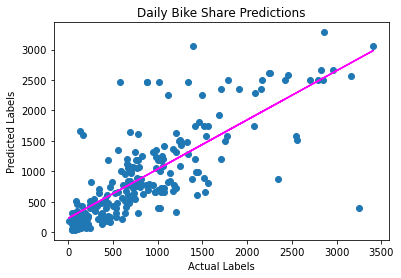

In [17]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

트리 기반 모델은 선형 모델보다 개선되지 않은 것 같습니다. 그렇다면 다른 무엇을 시도해 볼 수 있을까요?

### 앙상블 알고리즘 시도

앙상블 알고리즘은 여러 기본 추정기를 결합하여 최적의 모델을 생성하는 방식으로 작동합니다. 집계 함수를 기본 모델 모음(*배깅* 이라고도 함)에 적용하거나 예측 성능을 향상시키기 위해 서로 참고하여 개선해나가는 일련의 모델을 구축합니다(*부스팅*이라고 함).

예를 들어, 더 나은 전체 모델을 위해 여러 의사 결정 트리 모델에 평균화 함수를 적용하는 Random Forest 모델을 사용해 보겠습니다.

RandomForestRegressor() 

MSE: 113559.45196136365
RMSE: 336.98583347280885
R2: 0.7773738218346113


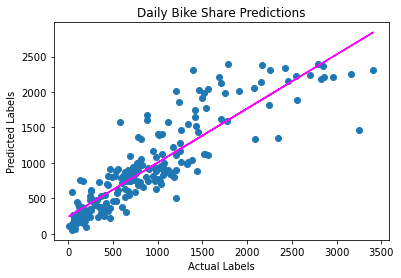

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

좋은 측정을 위해 *부스팅* 앙상블 알고리즘도 시도해 봅시다. Random Forest 알고리즘과 같이 여러 트리를 빌드하는 Gradient Boosting 추정기를 사용할 것 입니다. 그러나 트리를 모두 독립적으로 빌드하고 평균 결과를 취하는 대신 각 트리는 이전 트리 *Loss*(error)의 출력을 기반으로 빌드됩니다.

GradientBoostingRegressor() 

MSE: 103568.97954029309
RMSE: 321.82134724143623
R2: 0.796959515977679


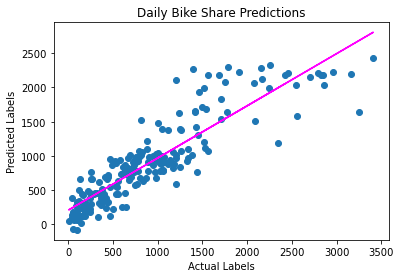

In [19]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## 하이퍼 파라미터 최적화

위 출력에서 **GradientBoostingRegressor** estimator 정의를 살펴보고 이전에 시도한 다른 estimator과 마찬가지로 모델 학습 방식을 제어하는 많은 파라미터를 포함하고 있습니다. 기계 학습에서 *parameter*라는 용어는 데이터에서 확인할 수있는 값을 나타냅니다. 훈련 알고리즘의 동작에 영향을주기 위해 지정하는 값을 *hyper parameter*라고하는 것이 더 정확합니다.

estimator의 특정 하이퍼 파라미터는 estimator가 캡슐화하는 알고리즘에 따라 다릅니다. **GradientBoostingRegressor**의 경우 알고리즘은 여러 의사 결정 트리를 결합하여 전체 예측 모델을 생성하는 앙상블입니다. [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)에서이 estimator의 하이퍼 파라미터에 대해 알아볼 수 있습니다.

여기서는 각 하이퍼 파라미터의 세부 사항을 다루지 않겠지만 알고리즘이 모델을 훈련하는 방식에 영향을 주기 위해 함께 작동합니다. 대부분의 경우 Scikit-Learn에서 제공하는 기본값이 잘 작동합니다. 그러나 더 나은 예측 성능을 얻거나 훈련 시간을 줄이기 위해 하이퍼 파라미터를 수정하면 몇 가지 이점이 있을 수 있습니다.

그렇다면 어떤 하이퍼 파라미터 값을 사용해야하는지 어떻게 알 수 있습니까? 글쎄요, 기본 알고리즘이 어떻게 작동하는지에 대한 깊은 이해가 없으면 실험을 해야합니다. 다행히 SciKit-Learn은 여러 조합을 시도하고 주어진 성능 지표에 대한 최상의 결과를 찾아 하이퍼 파라미터를 *조정*하는 방법을 제공합니다.

**GradientBoostingRegressor**의 **Learning_rate** 및 **n_estimators** 하이퍼 파라미터에 대해 가능한 값의 그리드에서 조합을 시도하기 위해 *grid search* 접근 방식을 사용해 보겠습니다.

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 100} 

GradientBoostingRegressor() 

MSE: 104187.87501020763
RMSE: 322.78146633629325
R2: 0.7957462102530457


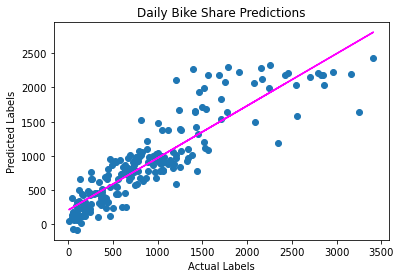

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

> **참조**: Gradient Boost 알고리즘에서 임의의 값을 사용하면 매번 조금씩 다른 메트릭이 생성됩니다. 이 경우, 하이퍼파라미터 튜닝으로 생성된 최상의 모델은 기본 하이퍼파라미터 값으로 학습된 모델보다 크게 나을 것 같지 않지만 하이퍼파라미터 튜닝 기술에 대해 아는 것이 여전히 유용합니다!


## 데이터 전처리

우리는 소스 파일에서 바로 불러온 데이터로 모델을 학습했지만 중간 정도의 성공만 거두었습니다.

실제로는 알고리즘이 모델에 더 쉽게 맞출 수 있도록 데이터에 대한 몇 가지 전처리를 수행하는 것이 일반적입니다. 데이터를 모델링할 수 있도록 하기 위해 수행할 수 있는 광범위한 전처리 혁신은 다음과 같은 몇 가지 일반적인 기법으로 제한됩니다.

### 수치형 변수 스케일

수치형 변수를 동일한 척도로 정규화하면 큰 값을 가진 특징이 예측에 불균형하게 영향을 미치는 계수를 생성하지 않습니다. 예를 들어 데이터에 다음과 같은 수치형 변수가 포함되어 있다고 가정합시다.

| A |  B  |  C  |
| - | --- | --- |
| 3 | 480 | 65  |
    
이러한 특징을 동일한 스케일로 정규화하면 다음과 같은 값이 발생할 수 있습니다(A에는 0 ~ 10 사이의 값, B에는 0 ~ 1000 사이의 값, C에는 0 ~ 100 사이의 값이 포함되어 있다고 가정):

|  A  |  B  |  C  |
| --  | --- | --- |
| 0.3 | 0.48| 0.65|

수치형 데이터의 비율은 각 열에 대한 최소값과 최대값을 계산하고 0과 1 사이의 비례 값을 할당하거나 정규 분포 변수의 평균과 표준 편차를 사용하여 다른 척도에서 동일한 값의 *spread* 을 유지하는 등 여러 가지 방법으로 지정할 수 있습니다

### 범주형 변수 인코딩

기계 학습 모델은 텍스트 값보다는 수치형 변수에서 가장 잘 작동하므로 일반적으로 범주형 변수를 숫자 표현으로 변환해야 합니다. 예를 들어 데이터에 다음과 같은 범주형 특징이 포함되어 있다고 가정합니다.

| Size |
| ---- |
|  S   |
|  M   |
|  L   |

*ordinal encoding* 을 적용하여 다음과 같이 각 범주에 고유한 정수 값을 대체할 수 있습니다.

| Size |
| ---- |
|  0   |
|  1   |
|  2   |

또 다른 일반적인 기술은 *one hot encoding* 을 사용하여 가능한 각 범주 값에 대해 개별 이진수(0 또는 1) 특징을 생성하는 것입니다. 예를 들어, 원-핫 인코딩을 사용하여 가능한 범주를 다음과 같은 이진 열로 변환할 수 있습니다:

|  Size_S  |  Size_M  |  Size_L  |
| -------  | -------- | -------- |
|    1     |     0    |    0     |
|    0     |     1    |    0     |
|    0     |     0    |    1     |

자전거 대여 데이터에 이러한 전처리를 적용하기 위해 *pipelines* 이라는 Scikit-Learn 기능을 활용할 예정입니다. 이를 통해 알고리즘으로 끝나는 일련의 전처리 단계를 정의할 수 있습니다. 그런 다음 전체 파이프라인을 데이터에 적용시켜 모델이 모든 전처리 단계와 회귀 알고리즘을 캡슐화할 수 있습니다. 모델을 사용하여 새 데이터의 값을 예측하려면 동일한 변환을 적용해야 하기 때문에 이 방법이 유용합니다(학습 데이터에 사용되는 동일한 통계 분포 및 범주 인코딩을 기반으로 함).

>**참조**: *pipeline* 이라는 용어는 기계 학습에서 광범위하게 사용되며, 매우 다른 의미를 갖는 경우가 많습니다! 이러한 맥락에서 우리는 Scikit-Learn에서 파이프라인 개체를 참조하는 데 사용되지만, 다른 곳에서 다른 의미를 갖는 경우도 있습니다.

In [21]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


전처리 단계를 포함하여 모델이 학습되었습니다. 검증 데이터로 어떤 성능을 나타내는지 알아보겠습니다.

MSE: 105665.63699330114
RMSE: 325.06251243922475
R2: 0.7928491506349159


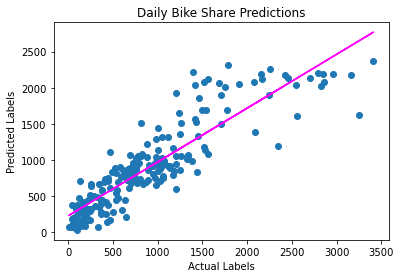

In [22]:
# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

파이프라인은 모델 학습에 사용되는 전처리 변환과 알고리즘으로 구성됩니다. 다른 알고리즘을 시도하려면 해당 단계를 다른 종류의 estimator로 변경할 수 있습니다.

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', RandomForestRegressor())]) 

MSE: 105190.42800454545
RMSE: 324.3307386057409
R2: 0.7937807680315243


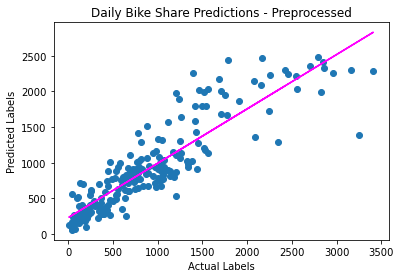

In [23]:
# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

이제 회귀 예측 모델을 훈련하는 데 사용되는 여러 일반적인 기술을 살펴보았습니다. 실제 프로젝트에서는 몇 가지 더 많은 알고리즘, 하이퍼 파라미터 및 전처리 변환을 시도할 것입니다. 이제 학습된 모델을 새 데이터와 함께 사용하는 방법을 살펴 보겠습니다.

### 훈련 된 모델 사용

먼저 모델을 저장하겠습니다.

In [24]:
import joblib

# Save the model as a pickle file
filename = './models/bike-share.pkl'
joblib.dump(model, filename)

['./models/bike-share.pkl']

이제 필요할 때 마다 로드하고 새 데이터의 레이블을 예측하는 데 사용할 수 있습니다. 이를 종종 *scoring* 또는 *inference*(추론)이라고합니다.

In [25]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]
Prediction: 100 rentals


모델의 **predict** 방법은 관측 값 배열을 허용 하므로 여러 예측을 한번에 하는데 사용할 수 있습니다. 예를 들어 다음 5 일 동안의 일기예보가 있다고 가정합니다. 이 모델을 사용하여 예상 날씨 조건에 따라 매일 자전거 대여를 예측할 수 있습니다.

In [26]:
# An array of features based on five-day weather forecast
X_new = np.array([[0,1,1,0,0,1,0.344167,0.363625,0.805833,0.160446],
                  [0,1,0,1,0,1,0.363478,0.353739,0.696087,0.248539],
                  [0,1,0,2,0,1,0.196364,0.189405,0.437273,0.248309],
                  [0,1,0,3,0,1,0.2,0.212122,0.590435,0.160296],
                  [0,1,0,4,0,1,0.226957,0.22927,0.436957,0.1869]])

# Use the model to predict rentals
results = loaded_model.predict(X_new)
print('5-day rental predictions:')
for prediction in results:
    print(np.round(prediction))

5-day rental predictions:
575.0
777.0
258.0
213.0
285.0


## 더 읽을 거리

Scikit-Learn에 대한 자세한 내용은[Scikit-Learn documentation](https://scikit-learn.org/stable/user_guide.html)를 참조하세요.

## 과제 : 부동산 가격 예측

자신만의 회귀 모델을 만들 준비가되었다고 생각 하시면 [/challenges/02 - Real Estate Regression Challenge.ipynb](./challenges/02%20-%20Real%20Estate%20Regression%20Challenge.ipynb) 노트북에서 부동산 가격 예측에 도전 해보세요!

> **참고** : 이 옵션 챌린지를 완료하는 데 걸리는 시간은이 연습의 예상 시간에 포함되지 않습니다. 원하는만큼 시간을 적게 또는 많이 사용할 수 있습니다!